In [1]:
##A few imports
import expyriment
import os
import pandas as pd
import matplotlib.pyplot as plt
data_path = 'C:\\Users\\DIEU\\Documents\\repositories\\PCBS_project\\data' #To change if run on another computer
os.chdir(data_path)

Expyriment 0.10.0 (Python 3.7.4) 


In [2]:
##We read data from the expyriment file, and clean it
expyriment.misc.data_preprocessing.write_concatenated_data(data_path, 'main', output_file='concatenated_data_all_participants', delimiter=',')

data=pd.read_csv('concatenated_data_all_participants',header=1)
sorted_data=data.sort_values(by=['condition'])
#We convert respkeys to number of perceive flashes to facilitate comprehension
sorted_data['respkey']=sorted_data['respkey']-256
final_data=sorted_data.rename(columns={"respkey" : "n_flash_perceived"})


** Expyriment Data Preprocessor **
found 6 subject_data sets
found 7 variables: ['subject_id', 'trial', 'condition', 'n_flash', 'n_beep', 'respkey', 'RT']
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_00_202104281150.xpd
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_01_202105041537.xpd
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_02_202105041540.xpd
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_03_202105041542.xpd
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_04_202105041554.xpd
   reading C:\Users\DIEU\Documents\repositories\PCBS_project\data\main_05_202105041558.xpd
write file: concatenated_data_all_participants (2544 cells in 318 rows)


In [3]:

##Now we can analyze our data
n_participants = final_data['subject_id'].max()
title_one_flash = f"""Averaged response of {n_participants} participants to a single flash of light"""
title_multiple_flashes_zero_beep = f"""Averaged response of {n_participants} participants to multiple flashes of light without beeps """
title_multiple_flashes_one_beep = f"""Averaged response of {n_participants} participants to multiple flashes of light and one beep """
list_beeps_one_flash = [0,1,2,3,4]
list_beeps_multiple_flashes=[0,1]
list_possible_flashes = [1,2,3,4]


In [4]:

##First we compute the mean and std of the response of participants to one flash 

response_participants_one_flash = final_data[final_data['n_flash']==1]

data_to_plot_one_flash=[]
std_data_to_plot_one_flash = []


for n_beep in list_beeps_one_flash:
    mean_response_participants_one_flash_n_beep = response_participants_one_flash[response_participants_one_flash['n_beep']==n_beep]['n_flash_perceived'].mean()
    std_response_participants_one_flash_n_beep=response_participants_one_flash[response_participants_one_flash['n_beep']==n_beep]['n_flash_perceived'].std()
    data_to_plot_one_flash.append(mean_response_participants_one_flash_n_beep)
    std_data_to_plot_one_flash.append(std_response_participants_one_flash_n_beep)


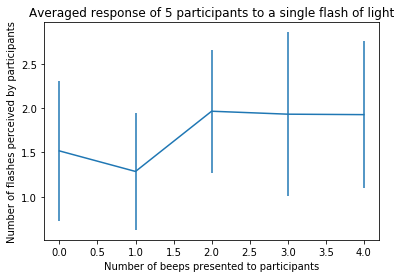

In [5]:
    
##Now we plot the data obtained
plt.figure(1)
plt.errorbar(x=list_beeps_one_flash,y=data_to_plot_one_flash,yerr=std_data_to_plot_one_flash)
plt.xlabel('Number of beeps presented to participants')
plt.ylabel('Number of flashes perceived by participants')
plt.title(title_one_flash)
plt.show()

We show here that we could not find replication of Shams et al's results : We have no clear trend of augmentation of the number of flashes perceived as a function of the number of beeps presented to participants 

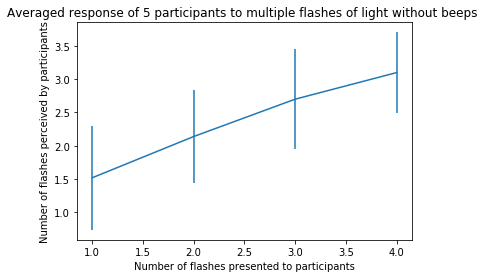

In [8]:
##Now we do the same for multiple flashes
#First for multiple flashes without beeps

data_to_plot_multiple_flashes_zero_beep=[]
std_data_to_plot_multiple_flashes_zero_beep = []
for n_flash in list_possible_flashes:
    response_participants_n_flash = final_data[final_data['n_flash']==n_flash]
    mean_response_participants_n_flash_zero_beep = response_participants_n_flash[response_participants_n_flash['n_beep']==0]['n_flash_perceived'].mean()
    std_response_participants_n_flash_zero_beep=response_participants_n_flash[response_participants_n_flash['n_beep']==0]['n_flash_perceived'].std()
    
    data_to_plot_multiple_flashes_zero_beep.append(mean_response_participants_n_flash_zero_beep)
    std_data_to_plot_multiple_flashes_zero_beep.append(std_response_participants_n_flash_zero_beep)

plt.figure(2)
plt.errorbar(x=list_possible_flashes,y=data_to_plot_multiple_flashes_zero_beep,yerr=std_data_to_plot_multiple_flashes_zero_beep)
plt.xlabel('Number of flashes presented to participants')
plt.ylabel('Number of flashes perceived by participants')
plt.title(title_multiple_flashes_zero_beep)
plt.show()



We show here that participants seem to correctly deduce the right number of flashes when they are presented with no sound, which seems to imply that our experiment is valid.

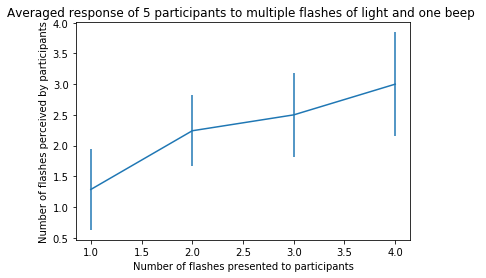

In [7]:
#Now for multiple flashes with beeps 
data_to_plot_multiple_flashes_one_beep=[]
std_data_to_plot_multiple_flashes_one_beep = []
for n_flash in list_possible_flashes:
    response_participants_n_flash = final_data[final_data['n_flash']==n_flash]
    mean_response_participants_n_flash_one_beep = response_participants_n_flash[response_participants_n_flash['n_beep']==1]['n_flash_perceived'].mean()
    std_response_participants_n_flash_one_beep=response_participants_n_flash[response_participants_n_flash['n_beep']==1]['n_flash_perceived'].std()
    
    data_to_plot_multiple_flashes_one_beep.append(mean_response_participants_n_flash_one_beep)
    std_data_to_plot_multiple_flashes_one_beep.append(std_response_participants_n_flash_one_beep)


plt.figure(3)
plt.errorbar(x=list_possible_flashes,y=data_to_plot_multiple_flashes_one_beep,yerr=std_data_to_plot_multiple_flashes_one_beep)
plt.xlabel('Number of flashes presented to participants')
plt.ylabel('Number of flashes perceived by participants')
plt.title(title_multiple_flashes_one_beep)
plt.show()

In the same way, we see here that the response of our participants is not driven by the number of beep they hear, which indicates that they understood the task correctly, and were indeed responding to the number of flashes they were presented with.